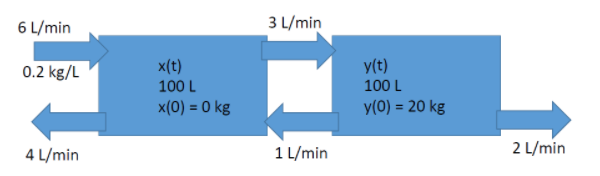
Naam: Siebe van Zwaal

De diferentiaal vergelijking van tank A is :

x'(t) = 0.2 * 6 + y(t) / 100 - x(t) * 7 / 100


De diferentiaal vergelijking van tank B is :

y'(t) = x(t) * 3 / 100 - y(t) * 3 / 100

Om deze vraagstelling op te lossen ga ik forward euler en heun gebruiken.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def forward_euler(stepsize = .1,time_in_sec = 300):
    '''function that iteratively applies the forward euler method to calculate the amount of salt sollution over time
    parameters stepsize: size of steps taken per second
    time_in_sec: over how many seconds we want to know the tanks contents 
    returns t: array containing time
    x: array containing amount of salt sollution over time in tank A
    y: array containing amount of salt sollution over time in tank B
    '''
    
    # h is de variabele voor stapgroote
    h = stepsize
    
    num_steps = int(time_in_sec/h)
    
    # t is een variabele die per tijdsstap 1 groter wordt
    t = np.zeros(num_steps + 1)
    # x bevat de hoeveelheid zoutoplossing in kg van tank A
    x = np.zeros(num_steps + 1)
    # y bevat de hoeveelheid zoutoplossing in kg van tank B
    y = np.zeros(num_steps + 1)
    
    #specifying initial values
    y[0] = 20
    x[0] = 0

    for step in range(num_steps):
        t[step + 1] = t[step] +h
        x[step + 1] = x[step] + (1.2 + y[step]/100 - (x[step]*7) /100 )*h
        y[step + 1] = y[step] + ((x[step]*3) /100 - (y[step]*3) /100 )*h
    return t, x, y

def plot_zout(t,x,y):
    axes_height = plt.subplot(211)
    plt.plot(t, x)
    axes_velocity = plt.subplot(212)
    plt.plot(t, y)
    axes_height.set_ylabel("Salt in kg in tank A")
    axes_velocity.set_ylabel("Salt in kg in tank B")
    axes_velocity.set_xlabel("Time in s")
    return plt.show() 
    

Hieronder staan twee grafiekjes die mooi laten zien wat er gebeurd met de hoeveelheden zoutoplossing in de tanks over tijd. Allebij de tanks hebben na een periode lang genoeg 20 kilogram zoutoplossing bereikt. Dit komt doordat de aanvoer van zoutoplossing in totaal even groot is als de afvoer van zoutoplossing waardoor de tanks (eerst tank A) langzaam vol lopen. Voor tank B geldt daarentegen dat hij eerst leeg loopt. Dit komt doordat er meer zout uit tank B naar tank A gaat dan er van tank A naar tank B gaat. Maar als tank A dan zijn maximale hoeveelheid zoutoplossing heeft bereikt begint tank B ook vol te lopen. 

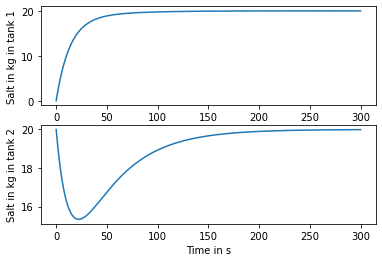

In [37]:
t,x,y = forward_euler(.1,300)
plot_zout(t,x,y)

Nu we forward euler hebben geschreven kunnen we beginnen aan Heun.

In [38]:
def heun(stepsize = .1,time_in_sec = 300):
    '''function that iteratively applies heuns method to calculate the amount of salt sollution over time
    parameters stepsize: size of steps taken per second
    time_in_sec: over how many seconds we want to know the tanks contents 
    returns t: array containing time
    x: array containing amount of salt sollution over time in tank A
    y: array containing amount of salt sollution over time in tank B
    '''
    h = stepsize

    num_steps = int(time_in_sec/h)
    
    # t is een variabele die per tijdsstap 1 groter wordt
    t = np.zeros(num_steps + 1)
    # x bevat de hoeveelheid zoutoplossing in kg van tank A
    x = np.zeros(num_steps + 1)
    # y bevat de hoeveelheid zoutoplossing in kg van tank B
    y = np.zeros(num_steps + 1)
    
    #specifying initial values
    y[0] = 20
    x[0] = 0

    for step in range(num_steps):
        t[step + 1] = t[step] +h
        x_tmp = x[step] + (1.2 + y[step]/100 - (x[step]*7) /100 )*h
        y_tmp = y[step] + ((x[step]*3) /100 - (y[step]*3) /100 )*h
        
        x[step + 1] = x[step] + ( (1.2 + y[step]/100 - (x[step]*7) /100)    +(1.2 + y_tmp/100 - (x_tmp*7) /100))*.5*h
        y[step + 1] = y[step] + (((x[step]*3) /100 - (y[step]*3) /100)      +((x_tmp*3) /100 - (y_tmp*3) /100))*.5*h
        
    return t, x, y


    



In [ ]:
Ik heb ook parameters toegevoegd aan beide functies zodat de stapgroote en tijdsduur makkelijk aangepast kunnen worden.

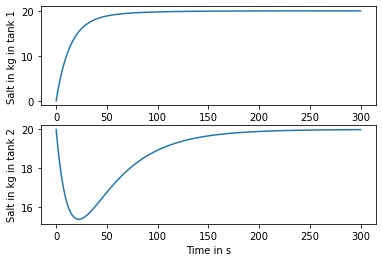

In [39]:
t, x, y = heun(.1,300)
plot_zout(t,x,y)